<a href="https://colab.research.google.com/github/alexlopesdesouzagearbest-debug/TrabalhoR/blob/main/Desafio_Pr%C3%A1tico_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Prático 2

Usando a linguagem R, a partir do seguinte dataset, apresente um gráfico que demonstre o desempenho dos times brasileiros nos jogos olímpicos (use a sua criatividade!):

In [ ]:
library(readr)
df <- read_csv('https://raw.githubusercontent.com/KeithGalli/Olympics-Dataset/refs/heads/master/results/results.csv', show_col_types = FALSE)

# Filtrando somente os times brasileiros que ganharam medalha:
df_br <- df[df$NOC == 'BRA' & !is.na(df$Medal),]

# Extraindo o atributo Year a partir de Games
df_br$Year <- as.integer(substr(df_br$Games, 1, 4))
head(df_br)

# Informe seu código aqui

Games,Event,Team,Pos,Medal,As,athlete_id,NOC,Discipline,Nationality,Unnamed: 7,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>
1960 Summer Olympics,"Basketball, Men (Olympic)",Brazil,3.0,Bronze,Wlamir Marques,5090,BRA,Basketball (Basketball),NA,NA,1960
1964 Summer Olympics,"Basketball, Men (Olympic)",Brazil,3.0,Bronze,Wlamir Marques,5090,BRA,Basketball (Basketball),NA,NA,1964
1996 Summer Olympics,"Basketball, Women (Olympic)",Brazil,2.0,Silver,Leila,5205,BRA,Basketball (Basketball),NA,NA,1996
1996 Summer Olympics,"Basketball, Women (Olympic)",Brazil,2.0,Silver,Marta Sobral,5206,BRA,Basketball (Basketball),NA,NA,1996
2000 Summer Olympics,"Basketball, Women (Olympic)",Brazil,3.0,Bronze,Marta Sobral,5206,BRA,Basketball (Basketball),NA,NA,2000
1996 Summer Olympics,"Basketball, Women (Olympic)",Brazil,2.0,Silver,Janeth,5218,BRA,Basketball (Basketball),NA,NA,1996


Dicas do que fazer:
1. Gráfico de linha do desempenho de uma determinada equipe ao longo dos anos;
1. Gráfico de barras das 10 equipes que mais ganharam medalhas;
1. Gráfico de barras das equipes que mais participaram de olimpíadas;
1. Gráfico de linhas dos esportes que mais trouxeram medalhas.

Total de medalhas do Brasil por edição

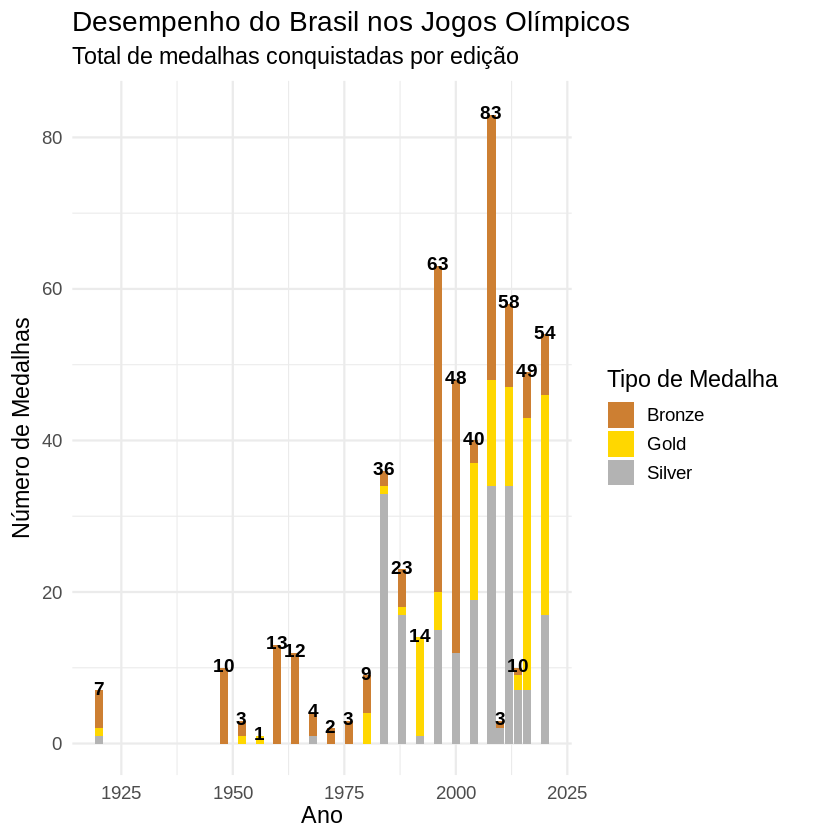

In [ ]:
library(ggplot2)
library(dplyr)

# Agrupar por ano e tipo de medalha
df_medalhas <- df_br %>%
  group_by(Year, Medal) %>%
  summarise(Total = n(), .groups = "drop")

# Calcular o total de medalhas por ano (para o label)
df_totais <- df_medalhas %>%
  group_by(Year) %>%
  summarise(TotalMedalhas = sum(Total), .groups = "drop")

# Gráfico de barras empilhadas com rótulo
ggplot(df_medalhas, aes(x = Year, y = Total, fill = Medal)) +
  geom_bar(stat = "identity") +
  geom_text(data = df_totais,
            aes(x = Year, y = TotalMedalhas + 0.3, label = TotalMedalhas),
            inherit.aes = FALSE,
            fontface = "bold",
            size = 4) +
  scale_fill_manual(values = c("Gold" = "gold", "Silver" = "gray70", "Bronze" = "#cd7f32")) +
  labs(
    title = "Desempenho do Brasil nos Jogos Olímpicos",
    subtitle = "Total de medalhas conquistadas por edição",
    x = "Ano",
    y = "Número de Medalhas",
    fill = "Tipo de Medalha"
  ) +
  theme_minimal(base_size = 14)




Top 10 Paises com mais medalhas

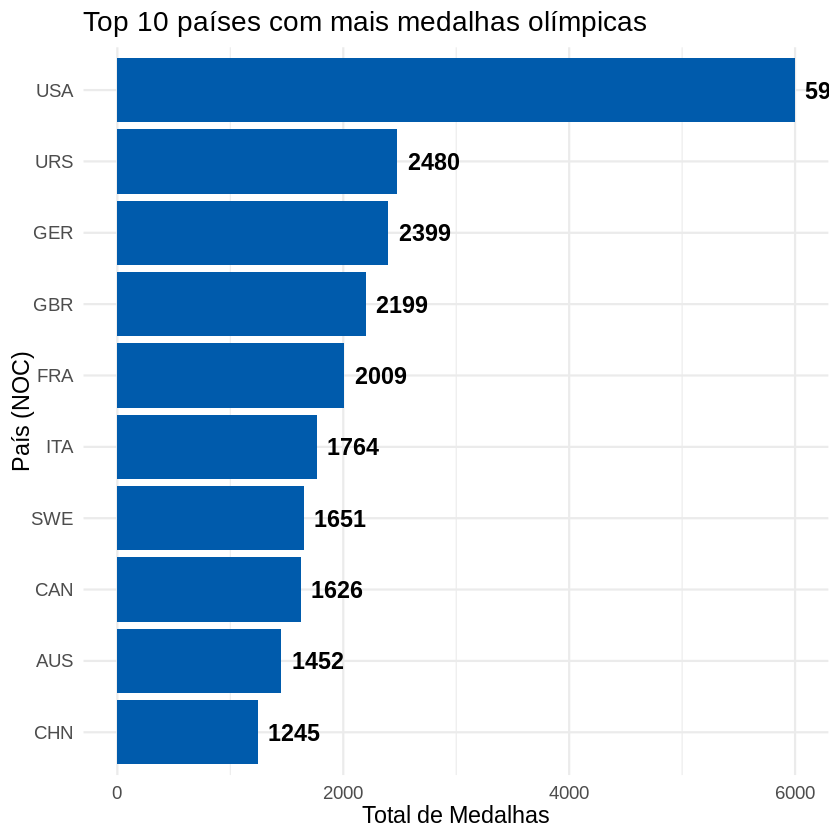

In [ ]:
library(dplyr)
library(ggplot2)

# Agrupar por NOC (país) e contar medalhas
df_paises <- df %>%
  filter(!is.na(Medal), !is.na(NOC)) %>%   # ignora medalhas e NOCs nulos
  group_by(NOC) %>%
  summarise(TotalMedalhas = n(), .groups = "drop") %>%
  arrange(desc(TotalMedalhas)) %>%
  slice_head(n = 10)   # pegar só os 10 primeiros países

# Gráfico de barras horizontais
ggplot(df_paises, aes(x = reorder(NOC, TotalMedalhas), y = TotalMedalhas)) +
  geom_col(fill = "#005BAC") +
  geom_text(aes(label = TotalMedalhas), hjust = -0.2, fontface = "bold") +
  coord_flip() +
  labs(
    title = "Top 10 países com mais medalhas olímpicas",
    x = "País (NOC)",
    y = "Total de Medalhas"
  ) +
  theme_minimal(base_size = 14)




Total de Medalhas por diciplina

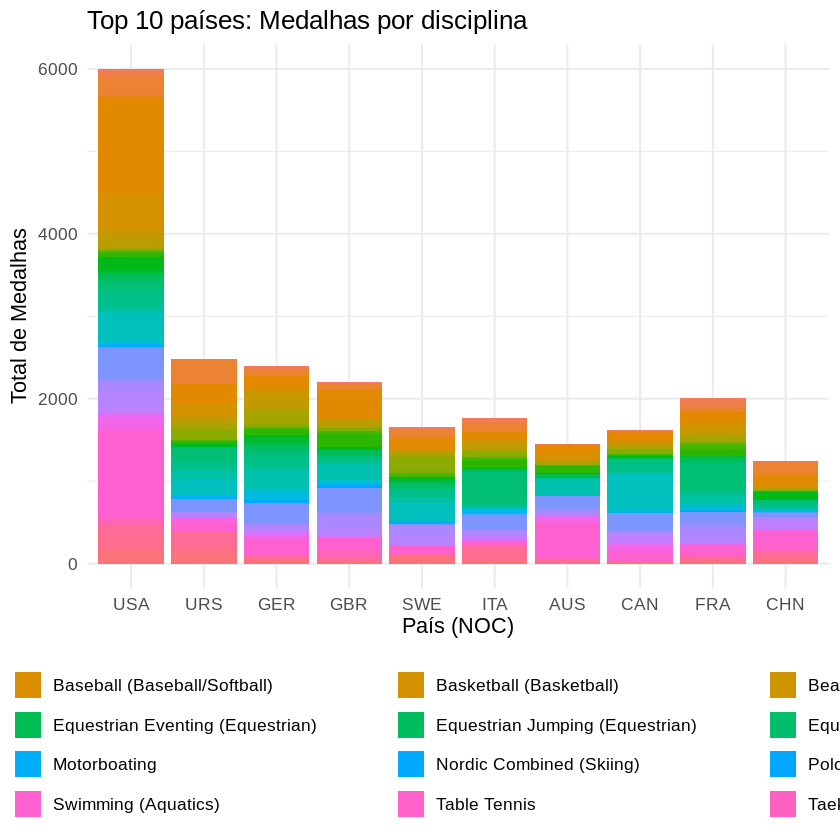

In [ ]:
library(dplyr)
library(ggplot2)

# Top 10 países por total de medalhas
top_noc <- df %>%
  filter(!is.na(Medal), !is.na(NOC)) %>%
  count(NOC, name = "TotalMedalhas") %>%
  arrange(desc(TotalMedalhas)) %>%
  slice_head(n = 10) %>%
  pull(NOC)

# Filtrar apenas os 10 países e contar medalhas por disciplina
df_noc_disc <- df %>%
  filter(!is.na(Medal), NOC %in% top_noc) %>%
  group_by(NOC, Discipline) %>%
  summarise(Total = n(), .groups = "drop")

# Gráfico de barras empilhadas por disciplina
ggplot(df_noc_disc, aes(x = reorder(NOC, -Total), y = Total, fill = Discipline)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Top 10 países: Medalhas por disciplina",
    x = "País (NOC)",
    y = "Total de Medalhas",
    fill = "Disciplina"
  ) +
  theme_minimal(base_size = 13) +
  theme(legend.position = "bottom") +
  guides(fill = guide_legend(nrow = 4, byrow = TRUE))


Total de Participações por Pais

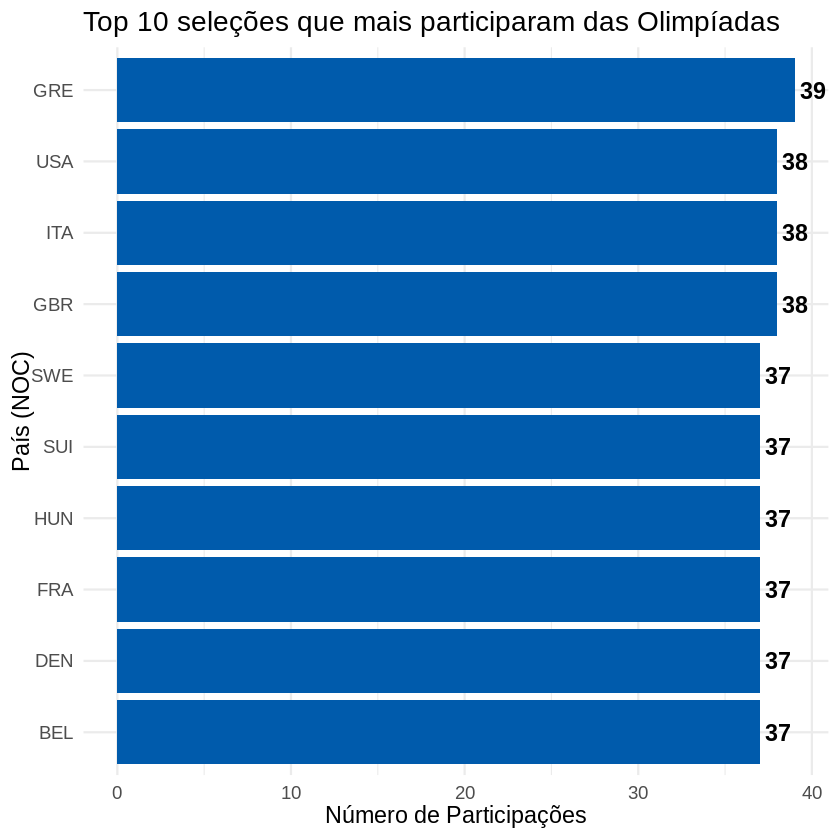

In [ ]:
library(dplyr)
library(ggplot2)

# Extraindo o atributo Year a partir de Games
df$Year <- as.integer(substr(df$Games, 1, 4))

# Contar participações únicas por país e ano
df_participacoes <- df %>%
  filter(!is.na(NOC), !is.na(Year)) %>%
  distinct(NOC, Year) %>%                 # garante 1 registro por país/ano
  group_by(NOC) %>%
  summarise(Participacoes = n(), .groups = "drop") %>%
  arrange(desc(Participacoes)) %>%
  slice_head(n = 10)   # Top 10 seleções

# Gráfico de barras horizontais
ggplot(df_participacoes, aes(x = reorder(NOC, Participacoes), y = Participacoes)) +
  geom_col(fill = "#005BAC") +
  geom_text(aes(label = Participacoes), hjust = -0.2, fontface = "bold") +
  coord_flip() +
  labs(
    title = "Top 10 seleções que mais participaram das Olimpíadas",
    x = "País (NOC)",
    y = "Número de Participações"
  ) +
  theme_minimal(base_size = 14)

In [ ]:
# Quantidade de edições distintas dos Jogos Olímpicos
n_olimpiadas <- df %>%
  distinct(Games) %>%
  nrow()

n_olimpiadas


[1] 62

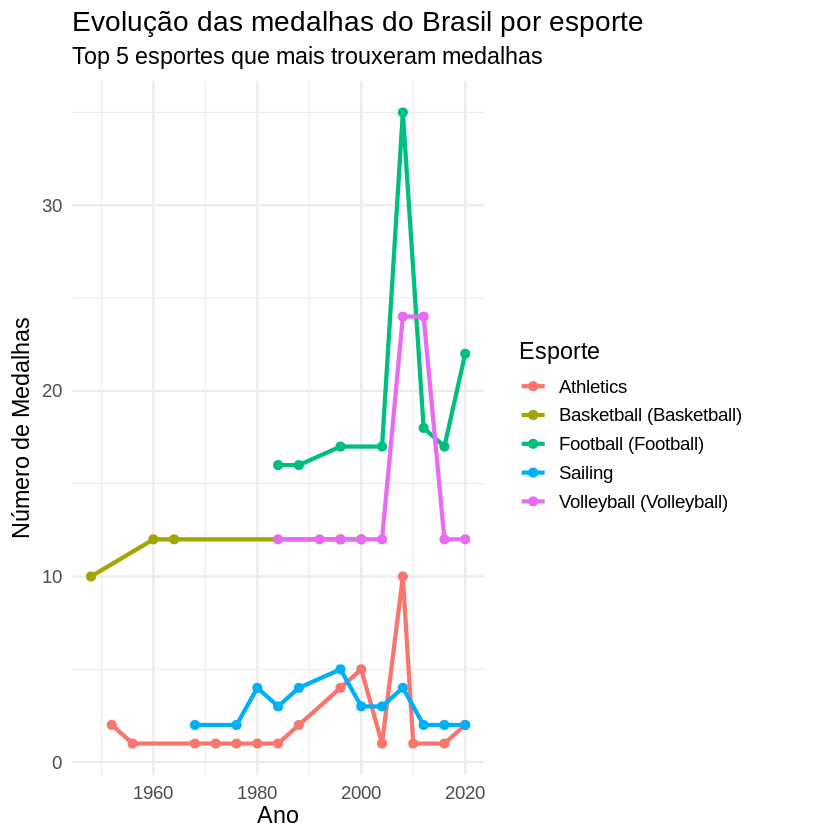

In [ ]:
library(dplyr)
library(ggplot2)

# Top 5 esportes que mais trouxeram medalhas para o Brasil
top_esportes <- df_br %>%
  count(Discipline, name = "TotalMedalhas") %>%
  arrange(desc(TotalMedalhas)) %>%
  slice_head(n = 5) %>%
  pull(Discipline)

# Filtrar Brasil apenas nos esportes do Top 5
df_esportes <- df_br %>%
  filter(Discipline %in% top_esportes) %>%
  group_by(Year, Discipline) %>%
  summarise(Medalhas = n(), .groups = "drop")

# Gráfico de linhas
ggplot(df_esportes, aes(x = Year, y = Medalhas, color = Discipline)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "Evolução das medalhas do Brasil por esporte",
    subtitle = "Top 5 esportes que mais trouxeram medalhas",
    x = "Ano",
    y = "Número de Medalhas",
    color = "Esporte"
  ) +
  theme_minimal(base_size = 14)
